In [2]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json

In [3]:
password_response, time_response, survey_response = get_responses(1)

Total: 26


## Password Analysis

In [4]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,Aksh4aya%dm,NaN,NaN,NaN
2,Ih7nmi!tb,NaN,NaN,NaN
3,0mgH4x0r*,NaN,NaN,NaN
4,TTI7WKAH^FR!,NaN,NaN,NaN
5,Pass@123$word,NaN,NaN,NaN
6,Abin3esh&dm,NaN,NaN,NaN
7,53642894,NaN,NaN,NaN
8,Ihbt7c@tya,NaN,NaN,NaN
9,iw4dt%%,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,11.610,111.018,6.067,8.859,57.643,156.844,7.002,85.860,107.917,50.812,12.061,63.077,11.312833
2,815.097,26.994,10.508,47.108,374.407,378.374,150.457,215.862,11.023,57.999,35.684,65.852,36.489417
3,1.374,12.144,2.570,4.465,21.145,69.909,3.354,60.452,10.703,20.888,2.649,23.224,3.881283
4,6.585,24.890,8.497,39.450,71.585,201.481,13.449,93.033,14.217,50.802,9.465,35.047,9.475017


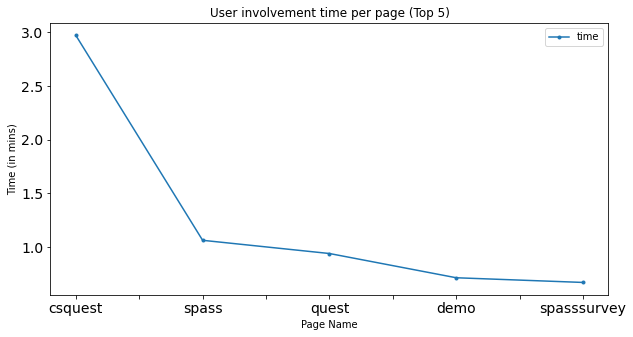

In [5]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [6]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [7]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
rewarding,6.0,5.0,6.0,7.0,6.0,7.0,5.0,5.0,5.0,5.0,...,7.0,3.0,4.0,5.0,3.0,4.0,6.0,3.0,5.076923,5.0
organized,7.0,5.0,7.0,7.0,5.0,7.0,5.0,3.0,5.0,6.0,...,7.0,5.0,3.0,7.0,5.0,4.0,3.0,4.0,5.730769,6.0
structured,7.0,5.0,7.0,7.0,4.0,7.0,6.0,2.0,5.0,6.0,...,7.0,5.0,5.0,7.0,6.0,7.0,7.0,4.0,5.961538,6.0
well grouped,7.0,6.0,7.0,7.0,4.0,7.0,6.0,4.0,5.0,4.0,...,7.0,6.0,6.0,6.0,5.0,6.0,4.0,4.0,5.884615,6.0
ordered,7.0,5.0,7.0,7.0,4.0,7.0,6.0,4.0,5.0,6.0,...,7.0,6.0,1.0,7.0,5.0,5.0,2.0,3.0,5.500000,6.0
beneficial,7.0,5.0,7.0,7.0,6.0,7.0,5.0,5.0,6.0,6.0,...,7.0,5.0,5.0,7.0,6.0,2.0,7.0,4.0,5.461538,6.0
helpful,7.0,6.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0,5.0,...,7.0,6.0,4.0,7.0,5.0,7.0,6.0,3.0,5.884615,6.0
easy,5.0,5.0,6.0,7.0,4.0,7.0,6.0,5.0,1.0,3.0,...,7.0,6.0,4.0,7.0,4.0,7.0,2.0,2.0,5.153846,5.0
appealing,6.0,6.0,7.0,7.0,1.0,7.0,5.0,5.0,4.0,6.0,...,5.0,3.0,5.0,6.0,3.0,5.0,1.0,2.0,4.653846,5.0
pleasant,4.0,5.0,7.0,7.0,1.0,7.0,6.0,5.0,4.0,6.0,...,7.0,6.0,6.0,5.0,3.0,6.0,1.0,2.0,4.769231,5.0


In [8]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')

Perspicuity: 5.336538461538462
Aesthetics: 4.480769230769231
Usefulness: 5.528846153846154
Clarity: 5.769230769230769


### CSQuest

In [9]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_info.csv')
csquestqual

FileNotFoundError: [Errno 2] No such file or directory: 'qualitative/csquest_info.csv'

In [ ]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,mean,median
Makes me worried,1.0,4.0,6.0,4.0,6.0,5.0,4.0,4.0,6.0,3.0,...,7.0,4.0,6.0,4.0,2.0,1.0,4.0,2.0,4.481481,4.740741
Encourages me to create a strong password,6.0,6.0,6.0,5.0,7.0,6.0,6.0,7.0,7.0,6.0,...,7.0,5.0,7.0,5.0,7.0,4.0,5.0,6.0,6.148148,6.000000
Makes me feel emotionally connected to the presented scenario,5.0,4.0,5.0,4.0,5.0,5.0,6.0,3.0,2.0,6.0,...,7.0,4.0,7.0,2.0,5.0,1.0,5.0,5.0,4.925926,5.000000
Makes me feel personally connected to the presented scenario,7.0,5.0,5.0,5.0,6.0,5.0,6.0,3.0,2.0,5.0,...,7.0,5.0,6.0,5.0,5.0,1.0,6.0,7.0,5.222222,5.111111
easy to follow,6.0,7.0,6.0,6.0,7.0,4.0,5.0,7.0,7.0,4.0,...,7.0,5.0,6.0,4.0,7.0,6.0,5.0,6.0,5.851852,6.000000
Novel,7.0,6.0,6.0,4.0,4.0,5.0,5.0,4.0,4.0,6.0,...,4.0,5.0,6.0,5.0,4.0,4.0,5.0,7.0,5.037037,5.000000
Informative,6.0,7.0,6.0,5.0,6.0,5.0,6.0,6.0,7.0,6.0,...,7.0,6.0,7.0,4.0,6.0,6.0,6.0,6.0,6.185185,6.000000
Easy to understand,6.0,7.0,6.0,7.0,7.0,7.0,6.0,6.0,6.0,7.0,...,7.0,5.0,7.0,5.0,7.0,7.0,6.0,6.0,6.444444,7.000000
To the Point,7.0,7.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,5.0,...,7.0,5.0,5.0,4.0,6.0,7.0,6.0,7.0,6.296296,6.648148
Engaging,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,...,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,6.074074,6.000000


### First Password Survey

In [ ]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,mean,median
"I do not change my passwords, unless I have to.",5,2,6,6,6,7,2,6,7,3,...,1,5,5,5,6,2,6,7,5.037037,6.0
I use different passwords for different online accounts that I have.,7,7,6,6,4,6,6,7,7,6,...,7,7,7,4,6,7,5,6,5.518519,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",6,5,6,5,5,5,6,7,7,5,...,7,2,7,5,7,7,6,7,5.555556,6.0
I do not include special characters in my password if it’s not required.,1,1,7,1,2,1,1,1,2,3,...,1,7,4,3,2,1,2,6,2.666667,2.0


### Second Password Survey

In [ ]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,mean,median
strength of password,7,6,7,7,6,6,7,4,6,7,...,6,5,7,6,6,7,5,7,6.259259,6.129630
motivated after going through design,7,7,7,7,7,5,7,5,7,6,...,7,5,6,4,7,4,6,6,6.185185,6.092593
Hard to remember,6,4,6,7,3,6,4,5,6,5,...,3,6,7,2,2,7,3,7,4.629630,4.814815
Can be easily guessed by a hacker,1,1,6,1,2,7,1,1,1,6,...,1,4,2,1,2,1,3,6,2.370370,1.500000
Can be easily guessed by my close friends or family members,1,1,6,1,2,6,1,1,1,6,...,1,1,2,2,1,1,4,7,2.333333,1.500000
Stronger than the passwords I usually use,7,4,6,7,4,5,2,1,3,5,...,6,6,7,6,2,2,2,6,4.888889,5.000000


### Demographics

In [ ]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,35-39 years old,[Native American or American Indian],Four-year College Degree,Business,Business or industry,Pursuing or completed a degree,Formal training
1,Man,Above 65 years old,[White],Two-year College Degree,"Journalism, Media and Communication",retired,Self-taught,Self-taught
2,Woman,25-29 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Self-taught
3,Man,50-54 years old,[Asian],Graduate degree (MS/Doctorate),"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught
4,Man,30-34 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Self-taught
5,Man,40-44 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Hold or held a work position
6,Man,45-49 years old,[White],Graduate degree (MS/Doctorate),Business,Government,Self-taught,Self-taught
7,Man,40-44 years old,[White],Less than High School,I prefer not to answer,I prefer not to answer,Self-taught,Self-taught
8,Man,30-34 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Self-taught
9,Man,55-59 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,No experience


In [ ]:
demo['What is your gender?'].value_counts()

Man      23
Woman     4
Name: What is your gender?, dtype: int64